<a href="https://colab.research.google.com/github/jingyi0936/PyEMD-Example/blob/main/emd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMD Analysis Example 
[PyEMD](https://pyemd.readthedocs.io/en/latest/) : documentation of PyEMD
    
 *超链接是PyEMD的索引*

In [ ]:
pip install EMD-signal

In [2]:
from PyEMD import EMD
import numpy as np
import pandas as pd
import pylab as plt

## Define s reprenting signal and t representing time

In [3]:
# Define signal 定义信号
s = pd.read_csv('data.csv') # csv file should have only one column
# You can choose header to be T/F
# s is now stored in a Pandas Dataframe
s = s.to_numpy() # convert the data frame to a numpy array
s = np.concatenate(s) # concatenate s to ensure the shape of s and t being the same

In [4]:
t = np.linspace(0, 1, len(s)) # length of s and t should be the same

## Execute EMD on signal
执行EMD算法




In [5]:
IMF = EMD().emd(s, t)
N = IMF.shape[0] + 1

In [6]:
# Get the shape of IMF calculated
IMF.shape

(5, 219)

## Extract IMF and Plot Results
提取IMF


1.   IMF1 + IMF2 + IMF3 + IMF4
2.   IMF1 + IMF2 + IMF3
3.   Summary Figure




In [7]:
data = pd.DataFrame({'Column1': IMF[0, :], 'Column2': IMF[1, :], 'Column3': IMF[2, :], 'Column4': IMF[3, :], 'Column5': IMF[4, :]})

### IMF1 + IMF2 +IMF3 + IMF4
Column 2 + Column 3 + Column 4 + Column5

In [9]:
new = data['Column2'] + data['Column3'] + data['Column4'] + data['Column5']

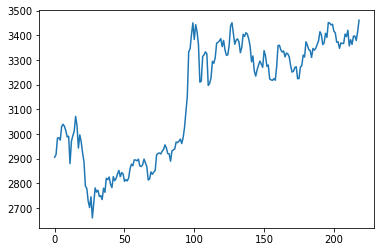

In [ ]:
plt.plot(s) # original signal

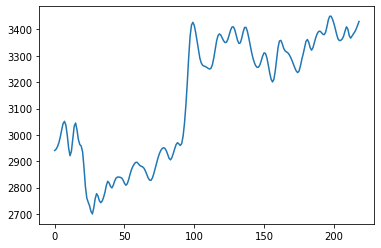

In [ ]:
plt.plot(new) # new signal combined of IMF1 + IMF2 + IMF3 + IMF4, IMF1 is ignored

### IMF1 + IMF2 + IMF3
Column 2 + Column 3 + Column 4

In [10]:
new1 = data['Column2'] + data['Column3'] + data['Column4'] 

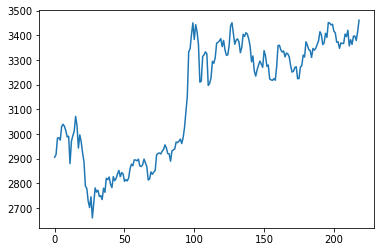

In [11]:
plt.plot(s) # original signal

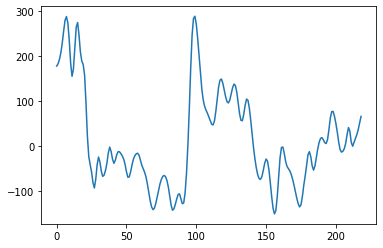

In [12]:
plt.plot(new1)

### Plots of Each IMF in one figure

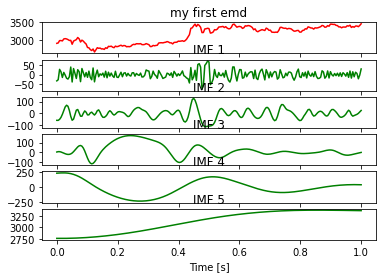

In [ ]:
# Plot results
plt.subplot(N,1,1)
plt.plot(t, s, 'r')
plt.title("my first emd")
plt.xlabel("Time [s]")
for n, imf in enumerate(IMF):
  plt.subplot(N, 1, n + 2)
  plt.plot(t, imf, 'g')
  plt.title("IMF "+str(n+1))
  plt.xlabel("Time [s]")

plt.savefig('simple_example')
plt.show()